# Coding Cheat Sheet

## *-Imports*

In [2]:
# Initial imports
import os
import csv
import quandl
import requests
import numpy as np
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation

%matplotlib inline

# I. Python

## 1. File IO

In [2]:
# Check the current directory where the Python program is executing from
print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: C:\Users\jeffr\desktop\github


In [3]:
# Set the input file path irregardless of OS
filepath = Path("../Github/cheatsheetresources/input.txt")

In [4]:
# Open the file in "read" mode ('r') and store the
# contents in the variable "text"
with open(filepath, 'r') as file:
    # Store all of the text from the file inside a variable called "text"
    # and print the contexts of the text file
    text = file.read()
    print(text)
# Parse and print the file line by line. The print statement adds an
# extra line break to each line in the output.
    line_num = 1
    for line in file:
        print(f"line {line_num}: {line}")
        line_num += 1


Example


In [5]:
# Set the output file path
output_path = Path("cheatsheetresources/output.txt")

In [6]:
# Open the output_path as a file object in "write" mode ('w')
# Write a header line and write the contents of 'text' to the file
with open(output_path, 'w') as file:
    file.write("This is an output file.\n")
    file.write(text)


## 2. CSV

In [7]:
# Set the file path
csvpath = Path('../Github/cheatsheetresources/accounting.csv')

In [8]:
# Initialize variable to hold salaries
salaries = []

In [9]:
# Initialize line_num variable
line_num = 0

In [10]:
# Open the input path as a file object
with open(csvpath, 'r') as csvfile:

    # Print the datatype of the file object
    print(type(csvfile))

    # Pass in the csv file to the csv.reader() function
    # (with ',' as the delmiter/separator) and return the csvreader object
    csvreader = csv.reader(csvfile, delimiter=',')
    # Print the datatype of the csvreader
    print(type(csvreader))

    # Go to the next row from the start of the file
    # (which is often the first row/header) and iterate line_num by 1
    header = next(csvreader)
    line_num += 1
    # Print the header
    print(f"{header} <---- HEADER")

    # Read each row of data after the header
    for row in csvreader:
        # Print the row
        print(row)
        # Set salary variable equal to the value in the 4th column of each row
        salary = int(row[3])
        # Append the row salary value to the list of salaries
        salaries.append(salary)

<class '_io.TextIOWrapper'>
<class '_csv.reader'>
['First Name', 'Last Name', 'SSN', 'Salary'] <---- HEADER
['Tina', 'Fleming', '619-16-7988', '75000']
['Erica', 'Shah', '164-51-7615', '40000']
['Paula', 'Ortiz', '051-83-3290', '120000']
['James', 'Hendricks', '776-83-2884', '90000']
['Lauren', 'King', '197-94-2398', '60000']
['David', 'Cowan', '252-92-1832', '35000']
['Andrew', 'Burton', '296-23-6842', '150000']
['Julian', 'Baker', '337-40-7543', '75000']
['Scott', 'Castro', '399-46-5595', '50000']
['Billy', 'Rodriguez', '014-18-2503', '65000']
['Darrell', 'Leblanc', '005-82-7918', '40000']
['David', 'Hammond', '561-17-6312', '90000']


In [11]:
# Initialize metric variables
max_salary = 0
min_salary = 0
avg_salary = 0
total_salary = 0
count_salary = 0

### Looping & conditional statement

In [12]:
#if True:
    # Do something
#else:
    # Do something else

In [13]:
# Calculate the max, mean, and average of the list of salaries
for salary in salaries:

    # Sum the total and count variables
    total_salary += salary
    count_salary += 1

    # Logic to determine min and max salaries
    if min_salary == 0:
        min_salary = salary
    elif salary > max_salary:
        max_salary = salary
    elif salary < min_salary:
        min_salary = salary

In [14]:
# Calculate the average salary, round to the nearest 2 decimal places
avg_salary = round(total_salary / count_salary, 2)

# Print the metrics
print(max_salary, min_salary, avg_salary)

# Set the output header
header = ["Max_Salary", "Min_Salary", "Avg_Salary"]
# Create a list of metrics
metrics = [max_salary, min_salary, avg_salary]

# Set the output file path
output_path = Path('cheatsheetresources/output.csv')

# Open the output path as a file object
with open(output_path, 'w') as csvfile:
    # Set the file object as a csvwriter object
    csvwriter = csv.writer(csvfile, delimiter=',')
    # Write the header to the output file
    csvwriter.writerow(header)
    # Write the list of metrics to the output file
    csvwriter.writerow(metrics)

150000 35000 74166.67


## 3. Dictionary

In [15]:
# san_francisco = {
#     "west_coast": True,
#     "has_multiple_bridges": True,
#     "known_for_pizza": False,
#     "coastal": True,
#     "snows": False,
#     "very_hot": False,
#     "mayor": "London Breed",
#     "state": "California",
#     "country": "USA",
#     "best_food": "burritos",
#     "sports_teams": ["Giants", "Warriors", "Forty-Niners"],
#     "tallest_building": "SalesForce Building",
#     "population": 884363,
#     "city_size": "large",
#     "median_house_price": 1610000,
#     "famous_residents": ["Maya Angelou", "Robert Frost", "Carlos Santana"],
#     "homeless_pop": 1150,
#     "political_leaning": "Democrat",
#     "notable_attractions": ["Alcatraz", "Golden Gate Bridge", "Fisherman's Wharf"],
#     "natural_disasters": ["Earthquakes"],
# }

# Re-create the content of the commented out `san_francisco` dictionary by using bracket notation to manually add each of the key-value pairs (including nested objects).
san_francisco = {}

san_francisco['west_coast'] = True
san_francisco['has_multiple_bridges'] = True
san_francisco['known_for_pizza'] = False
san_francisco['coastal'] = True
san_francisco['snows'] = False
san_francisco['very_hot'] = False
san_francisco['mayor'] = "London Breed"
san_francisco['state'] = "California"
san_francisco['country'] = "USA"
san_francisco['best_food'] = "burritos"
san_francisco['sports_teams'] = ["Giants", "Warriors", "Forty-Niners"]
san_francisco['tallest_building'] = "SalesForce Building"
san_francisco['population'] = 884363
san_francisco['city_size'] = "large"
san_francisco['median_house_price'] = 1610000
san_francisco['famous_residents'] = ["Maya Angelous", "Robert Frost", "Carlos Santana"]
san_francisco['homeless_pop'] = 1150
san_francisco['political_leaning'] = "Democrat"
san_francisco['notable_attractions'] = ["Alcatraz", "Golden Gate Bridge", "Fisherman's Wharf"]
san_francisco['natural_disasters'] = ["Earthquakes"]

# Print the manually modified `san_francisco` dictionary and confirm the contents match the commented out version.
print(san_francisco)

{'west_coast': True, 'has_multiple_bridges': True, 'known_for_pizza': False, 'coastal': True, 'snows': False, 'very_hot': False, 'mayor': 'London Breed', 'state': 'California', 'country': 'USA', 'best_food': 'burritos', 'sports_teams': ['Giants', 'Warriors', 'Forty-Niners'], 'tallest_building': 'SalesForce Building', 'population': 884363, 'city_size': 'large', 'median_house_price': 1610000, 'famous_residents': ['Maya Angelous', 'Robert Frost', 'Carlos Santana'], 'homeless_pop': 1150, 'political_leaning': 'Democrat', 'notable_attractions': ['Alcatraz', 'Golden Gate Bridge', "Fisherman's Wharf"], 'natural_disasters': ['Earthquakes']}


## *ex1. Algo Challenge*

In [16]:
# Import the `random` library.
import random

# Answer each question with the correct coding solution.

# QUESTION 1: Create a function called `number_guess` that takes in an integer as an argument.
# If the number is 42, print(true). If it isn't 42, print(false)
def number_guess(number):
    if number == 42:
        print(True)
    else:
        print(False)

# This code is to help you test your function
test_num = random.randint(40, 45)
print(f"Number {test_num}")
number_guess(test_num)

# QUESTION 2: Write a function that takes in a list of numbers. the function should print the smallest number in the given list
def find_smallest(list_param):
    minimum = 0

    for number in list_param:
        if minimum == 0:
            minimum = number
        elif number < minimum:
            minimum = number

    print(f"The smallest number in the list is {minimum}")

# This code is to help you test your function
nums = [10, 11, 3, 123, 54, 6, 67]
find_smallest(nums)

# QUESTION 3: Write a function which takes in a list of strings. The function should print the shortest string in the list.
def find_shortest(list_param):
    shortest_string = ""
    shortest_character_count = 0

    for string in list_param:
        count = 0

        for character in string:
            count += 1

        print(string, count)

        if shortest_character_count == 0:
            shortest_character_count = count
            shortest_string = string
        elif count < shortest_character_count:
            shortest_character_count = count
            shortest_string = string

    print(f"The shortest string is {shortest_string}")


# This code is to help you test your function
strings = ["hey there", "yo", "a", "hello", "what up", "hello, my name is farley", "howdy"]
find_shortest(strings)

#QUESTION 4: Write a function that takes in three arguments: a high value, a low value and a list of numbers.
# The function should print a new list of numbers where the elements are greater than the low value and less than the high value
def filter_list(high, low, list_param):
    filtered_list = []

    for number in list_param:
        if number > low and number < high:
            filtered_list.append(number)
    return filtered_list

# This code is to help you test your function
high = 20
low = 10
arr = [2,5,99,15,23,18,11,21]

filter_list(high, low, arr)

Number 41
False
The smallest number in the list is 3
hey there 9
yo 2
a 1
hello 5
what up 7
hello, my name is farley 24
howdy 5
The shortest string is a


[15, 18, 11]

## *ex2. Rock Paper Scissors!*

#### To run code change from Markdown cell to code cell
#### Incorporate the random library
import random

#### #Print Title
print("Let's Play Rock Paper Scissors!")

#### Specify the three options
options = ["r", "p", "s"]

#### Computer Selection
computer_choice = random.choice(options)

#### User Selection
user_choice = input("Make your Choice: (r)ock, (p)aper, (s)cissors? ")

#### Run Conditionals
if (user_choice == "r" and computer_choice == "p"):
    print("You chose rock. The computer chose paper.")
    print("Sorry. You lose.")

elif (user_choice == "r" and computer_choice == "s"):
    print("You chose rock. The computer chose scissors.")
    print("Yay! You won.")

elif (user_choice == "r" and computer_choice == "r"):
    print("You chose rock. The computer chose rock.")
    print("A smashing tie!")

elif (user_choice == "p" and computer_choice == "p"):
    print("You chose paper. The computer chose paper.")
    print("A smashing tie!")

elif (user_choice == "p" and computer_choice == "s"):
    print("You chose paper. The computer chose scissors.")
    print("Sorry. You lose.")

elif (user_choice == "p" and computer_choice == "r"):
    print("You chose paper. The computer chose rock.")
    print("Yay! You won.")

elif (user_choice == "s" and computer_choice == "p"):
    print("You chose scissors. The computer chose paper.")
    print("Yay! You won.")

elif (user_choice == "s" and computer_choice == "s"):
    print("You chose scissors. The computer chose scissors.")
    print("A smashing tie!")

elif (user_choice == "s" and computer_choice == "r"):
    print("You chose scissors. The computer chose rock.")
    print("Sorry. You lose.")

else:
    print("I don't understand that!")
    print("Next time, choose from 'r', 'p', or 's'.")

# II. Pandas

## 1. CSV

### I. Basics

#### i. Reading a CSV with a Header

In [18]:
# Step 1: Create a path to the file
csvpath = Path("cheatsheetresources/sales.csv")

In [19]:
# Step 2: Read the CSV into a DataFrame using Pandas
sales_dataframe = pd.read_csv(csvpath)
sales_dataframe.head()

,FullName,Email,Address,Zip,CreditCard,SalePrice
0,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,5327 0855 9720 7055,84.33
1,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,3717 498777 19636,879.95
2,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,3758 579477 35734,907.58
3,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,4400 0380 4162 1622,545.88
4,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,3712 263405 60178,517.49


#### ii. Reading a CSV with no Header

In [20]:
# Without a header in the CSV, Pandas will use the first row as the header
csvpath = Path("cheatsheetresources/sales_no_header.csv")
sales_data = pd.read_csv(csvpath)
sales_data.head()

,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,5327 0855 9720 7055,84.33
0,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,3717 498777 19636,879.95
1,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,3758 579477 35734,907.58
2,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,4400 0380 4162 1622,545.88
3,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,3712 263405 60178,517.49
4,Fermina Cobb,kingfisher2013@live.com,929 Prague Trail,16625,2351 7156 8193 8639,889.95


In [21]:
# Read the file without a header
sales_data = pd.read_csv(csvpath, header=None)
sales_data.head()

,0,1,2,3,4,5
0,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,5327 0855 9720 7055,84.33
1,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,3717 498777 19636,879.95
2,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,3758 579477 35734,907.58
3,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,4400 0380 4162 1622,545.88
4,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,3712 263405 60178,517.49


### II. Column Manipulation

#### i. Rewrite the column names

In [22]:
columns = ["Full Name", "Email", "Address", "Zip Code", "Credit Card Number", "Sale Price"]
sales_data.columns = columns
sales_data.head()

,Full Name,Email,Address,Zip Code,Credit Card Number,Sale Price
0,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,5327 0855 9720 7055,84.33
1,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,3717 498777 19636,879.95
2,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,3758 579477 35734,907.58
3,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,4400 0380 4162 1622,545.88
4,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,3712 263405 60178,517.49


#### ii. Replace Columns

In [23]:
sales_data.columns

Index(['Full Name', 'Email', 'Address', 'Zip Code', 'Credit Card Number',
       'Sale Price'],
      dtype='object')

In [24]:
# Rewrite the column names
columns = ["Full Name", "Email", "Address", "Zip Code", "Credit Card Number", "Account Balance"]
sales_data.columns = columns
sales_data.head()

,Full Name,Email,Address,Zip Code,Credit Card Number,Account Balance
0,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,5327 0855 9720 7055,84.33
1,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,3717 498777 19636,879.95
2,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,3758 579477 35734,907.58
3,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,4400 0380 4162 1622,545.88
4,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,3712 263405 60178,517.49


#### iii. Rename Columns

In [25]:
sales_data = sales_data.rename(columns={
    "Full Name": "full_name",
    "Credit Card Number": "credit_card_number"
})

sales_data.head()

,full_name,Email,Address,Zip Code,credit_card_number,Account Balance
0,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,5327 0855 9720 7055,84.33
1,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,3717 498777 19636,879.95
2,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,3758 579477 35734,907.58
3,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,4400 0380 4162 1622,545.88
4,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,3712 263405 60178,517.49


#### iv. Reorder Columns

In [26]:
sales_data = sales_data[['credit_card_number', 'Account Balance', 'full_name', 'Email', 'Address', 'Zip Code']]
sales_data.head()

,credit_card_number,Account Balance,full_name,Email,Address,Zip Code
0,5327 0855 9720 7055,84.33,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236
1,3717 498777 19636,879.95,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330
2,3758 579477 35734,907.58,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631
3,4400 0380 4162 1622,545.88,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168
4,3712 263405 60178,517.49,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721


#### v. Create Columns

In [27]:
sales_data["Balance (1k)"] = sales_data["Account Balance"] / 1000
sales_data.head()

,credit_card_number,Account Balance,full_name,Email,Address,Zip Code,Balance (1k)
0,5327 0855 9720 7055,84.33,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,0.08433
1,3717 498777 19636,879.95,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,0.87995
2,3758 579477 35734,907.58,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,0.90758
3,4400 0380 4162 1622,545.88,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,0.54588
4,3712 263405 60178,517.49,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,0.51749


#### vi. Split Columns

In [28]:
names = sales_data["full_name"].str.split(" ", expand=True)
names.head()

,0,1
0,Elwanda,White
1,Lyndon,Elliott
2,Daisey,Sellers
3,Issac,Reeves
4,Bradford,Kinney


In [29]:
sales_data["first_name"] = names[0]
sales_data["last_name"] = names[1]
sales_data.head()

,credit_card_number,Account Balance,full_name,Email,Address,Zip Code,Balance (1k),first_name,last_name
0,5327 0855 9720 7055,84.33,Elwanda White,alyre2036@live.com,352 Lakeshore Mall,9236,0.08433,Elwanda,White
1,3717 498777 19636,879.95,Lyndon Elliott,arrowy1873@outlook.com,1234 Avery Plaza,1330,0.87995,Lyndon,Elliott
2,3758 579477 35734,907.58,Daisey Sellers,toucan2024@outlook.com,469 Elwood Street,7631,0.90758,Daisey,Sellers
3,4400 0380 4162 1622,545.88,Issac Reeves,asarin1958@gmail.com,565 Phelps Field,81168,0.54588,Issac,Reeves
4,3712 263405 60178,517.49,Bradford Kinney,mibound1801@yandex.com,853 Mission Rock Freeway,41721,0.51749,Bradford,Kinney


#### vii. Delete Columns

In [30]:
sales_data = sales_data.drop(columns=["full_name"])
sales_data.head()

,credit_card_number,Account Balance,Email,Address,Zip Code,Balance (1k),first_name,last_name
0,5327 0855 9720 7055,84.33,alyre2036@live.com,352 Lakeshore Mall,9236,0.08433,Elwanda,White
1,3717 498777 19636,879.95,arrowy1873@outlook.com,1234 Avery Plaza,1330,0.87995,Lyndon,Elliott
2,3758 579477 35734,907.58,toucan2024@outlook.com,469 Elwood Street,7631,0.90758,Daisey,Sellers
3,4400 0380 4162 1622,545.88,asarin1958@gmail.com,565 Phelps Field,81168,0.54588,Issac,Reeves
4,3712 263405 60178,517.49,mibound1801@yandex.com,853 Mission Rock Freeway,41721,0.51749,Bradford,Kinney


#### viii. Generate summary statistics

In [31]:
sales_data.describe()

,Account Balance,Zip Code,Balance (1k)
count,100.000000,100.000000,100.000000
mean,533.007200,40952.160000,0.533007
std,275.531072,30207.118496,0.275531
min,29.720000,555.000000,0.029720
25%,328.507500,11109.750000,0.328508
50%,536.110000,40033.500000,0.536110
75%,767.885000,65834.750000,0.767885
max,998.760000,99877.000000,0.998760


### III. Data Cleaning

#### i. Read in CSV and take a sample

In [32]:
# Take sample of data
csv_path = Path("cheatsheetresources/order_data.csv")
csv_data = pd.read_csv(csv_path, index_col="order_no")
csv_data.sample(5)

,customer_no,order_total,order_date
order_no,,,
2356363,2124,258936.12,04-29-2019
45251825,CJ458565,14.00,04/25/2019
4465241327,AK45765,$1103.36,04-25-2019
452519232,NaN,$141.25,01-10-2019
45235825,TV4663,65.42,04-29-2019


#### ii. Identify DataFrame Data Types

In [33]:
# Retrieve DataFrame data types
csv_data.dtypes

customer_no    object
order_total    object
order_date     object
dtype: object

#### iii. Assess data quality by identifying the number of rows

In [34]:
# Identify Series count
csv_data.count()

customer_no    7
order_total    7
order_date     8
dtype: int64

#### iv. Assess data quality by identifying the number of times a value occurs


In [35]:
# Identify frequency values
csv_data["customer_no"].value_counts()

CM458565    2
AK45765     2
CJ458565    1
TV4663      1
2124        1
Name: customer_no, dtype: int64

#### v. Assess data quality by checking for nulls

In [36]:
# Check for null values
csv_data.isnull()

,customer_no,order_total,order_date
order_no,,,
452517125,False,False,False
45251825,False,False,False
4465241327,False,False,False
4465241327,False,False,False
413853121,False,True,False
45235825,False,False,False
2356363,False,False,False
452519232,True,False,False


#### vi. Assess data quality by determining the percentage of nulls

In [37]:
# Determine percentage of nulls
csv_data.isnull().mean() * 100

customer_no    12.5
order_total    12.5
order_date      0.0
dtype: float64

#### vii. Assess data quality by determining the number of nulls

In [38]:
# Determine number of nulls
csv_data.isnull().sum()

customer_no    1
order_total    1
order_date     0
dtype: int64

#### viii. Cleanse data by filling nulls with default value (i.e. "Unknown", 0, or mean() is common)

In [39]:
# Cleanse nulls from DataFrame by filling na
csv_data["customer_no"] = csv_data["customer_no"].fillna("Unknown")
csv_data

,customer_no,order_total,order_date
order_no,,,
452517125,CM458565,$141.25,01-10-2019
45251825,CJ458565,14.00,04/25/2019
4465241327,AK45765,$1103.36,04-25-2019
4465241327,AK45765,$1103.36,04-25-2019
413853121,CM458565,NaN,4/24/2019
45235825,TV4663,65.42,04-29-2019
2356363,2124,258936.12,04-29-2019
452519232,Unknown,$141.25,01-10-2019


#### ix. Cleanse data by dropping nulls

In [40]:
# Cleaning nulls from DataFrame by dropping
csv_data = csv_data.dropna().copy()
csv_data

,customer_no,order_total,order_date
order_no,,,
452517125,CM458565,$141.25,01-10-2019
45251825,CJ458565,14.00,04/25/2019
4465241327,AK45765,$1103.36,04-25-2019
4465241327,AK45765,$1103.36,04-25-2019
45235825,TV4663,65.42,04-29-2019
2356363,2124,258936.12,04-29-2019
452519232,Unknown,$141.25,01-10-2019


#### x. Checking number of nulls again

In [41]:
csv_data.isnull().sum()

customer_no    0
order_total    0
order_date     0
dtype: int64

#### xi. Assess data quality by checking for duplicate rows

In [42]:
# Check duplicates
csv_data.duplicated()

order_no
452517125     False
45251825      False
4465241327    False
4465241327     True
45235825      False
2356363       False
452519232     False
dtype: bool

#### xii. Assess data quality by checking for duplicate customer_no values

In [43]:
# Check duplicates for specific field
csv_data["customer_no"].duplicated()

order_no
452517125     False
45251825      False
4465241327    False
4465241327     True
45235825      False
2356363       False
452519232     False
Name: customer_no, dtype: bool

#### xiii. Cleanse data by dropping duplicates

In [44]:
# Clean duplicates
csv_data = csv_data.drop_duplicates().copy()
csv_data["customer_no"].duplicated()

order_no
452517125     False
45251825      False
4465241327    False
45235825      False
2356363       False
452519232     False
Name: customer_no, dtype: bool

#### xiv. Assess data quality by using `head` function to sample data and identify currency symbols

In [45]:
# Identify if numeric field with $ symbol
csv_data.head()

,customer_no,order_total,order_date
order_no,,,
452517125,CM458565,$141.25,01-10-2019
45251825,CJ458565,14.00,04/25/2019
4465241327,AK45765,$1103.36,04-25-2019
45235825,TV4663,65.42,04-29-2019
2356363,2124,258936.12,04-29-2019


#### xv. Cleanse data by replacing currency symbols

In [46]:
# Clean identified numeric fields with $ symbol
csv_data["order_total"] = csv_data["order_total"].str.replace("$", "")
csv_data["order_total"]

C:\Users\jeffr\AppData\Local\Temp/ipykernel_21536/486034041.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  csv_data["order_total"] = csv_data["order_total"].str.replace("$", "")


order_no
452517125        141.25
45251825          14.00
4465241327      1103.36
45235825          65.42
2356363       258936.12
452519232        141.25
Name: order_total, dtype: object

In [47]:
# Retrieve data types to confirm what needs to be converted
csv_data.dtypes

customer_no    object
order_total    object
order_date     object
dtype: object

In [48]:
# Convert `order_total` from `object` to `float`
csv_data["order_total"] = csv_data["order_total"].astype("float")

In [49]:
# Confirm conversion worked as expected
csv_data.dtypes

customer_no     object
order_total    float64
order_date      object
dtype: object

### IV. Indexing `loc` & `iloc`

#### i. Read CSV in as DataFrame

In [50]:
# Set the file path
file_path = Path('cheatsheetresources/people.csv')

# Read in the CSV as a DataFrame
people_csv = pd.read_csv(file_path)
people_csv.head()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,F,54,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,M,47,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,M,42,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,M,45,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,F,37,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


#### ii. View Summary Statistics (Default Numeric) 

In [51]:
# View the summary statistics for the DataFrame, the describe() function defaults to only numerical data
people_csv.describe()

,age
count,500.000000
mean,42.130000
std,10.702625
min,24.000000
25%,33.000000
50%,43.000000
75%,52.000000
max,60.000000


#### iii. View Summary Statistics (All Columns)

In [53]:
# View the summary statistics for the DataFrame, include all columns
people_csv.describe(include='all')

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
count,500,500,500,500.000000,500,500,500,500,500,500,500,500,500
unique,479,498,2,NaN,498,500,468,102,500,500,500,500,498
top,Antonio,Rampy,F,NaN,Martin Morrissey,14 Taylor St,City and Hunslet Ward,Greater London,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.martinmorrissey.co.uk
freq,3,2,301,NaN,2,1,3,44,1,1,1,1,2
mean,NaN,NaN,NaN,42.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,10.702625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### iv. Index Selection Using `iloc`

##### Select the first row of the DataFrame

In [54]:
people_csv.iloc[0]

first_name                                   Aleshia
last_name                                 Tomkiewicz
gender                                             F
age                                               54
company_name                 Alan D Rosenburg Cpa Pc
address                                 14 Taylor St
city                               St. Stephens Ward
county                                          Kent
postal                                       CT2 7PP
phone1                                  01835-703597
phone2                                  01944-369967
email                        atomkiewicz@hotmail.com
web             http://www.alandrosenburgcpapc.co.uk
Name: 0, dtype: object

##### Select the second row of the DataFrame

In [58]:
people_csv.iloc[1] 

first_name                                   Evan
last_name                               Zigomalas
gender                                          M
age                                            47
company_name                   Cap Gemini America
address                               5 Binney St
city                                   Abbey Ward
county                            Buckinghamshire
postal                                   HP11 2AX
phone1                               01937-864715
phone2                               01714-737668
email                    evan.zigomalas@gmail.com
web             http://www.capgeminiamerica.co.uk
Name: 1, dtype: object

##### Select the first 10 rows of the DataFrame

In [56]:
people_csv.iloc[0:10] 

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,F,54,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,M,47,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,M,42,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,M,45,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,F,37,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk
5,Eric,Rampy,M,28,"Thompson, Michael C Esq",9472 Lind St,Desborough,Northamptonshire,NN14 2GH,01969-886290,01545-817375,erampy@rampy.co.uk,http://www.thompsonmichaelcesq.co.uk
6,Marg,Grasmick,F,44,Wrangle Hill Auto Auct & Slvg,7457 Cowl St #70,Bargate Ward,Southampton,SO14 3TY,01865-582516,01362-620532,marg@hotmail.com,http://www.wranglehillautoauctslvg.co.uk
7,Laquita,Hisaw,F,40,In Communications Inc,20 Gloucester Pl #96,Chirton Ward,Tyne & Wear,NE29 7AD,01746-394243,01590-982428,laquita@yahoo.com,http://www.incommunicationsinc.co.uk
8,Lura,Manzella,F,53,Bizerba Usa Inc,929 Augustine St,Staple Hill Ward,South Gloucestershire,BS16 4LL,01907-538509,01340-713951,lura@hotmail.com,http://www.bizerbausainc.co.uk
9,Yuette,Klapec,F,55,Max Video,45 Bradfield St #166,Parwich,Derbyshire,DE6 1QN,01903-649460,01933-512513,yuette.klapec@klapec.co.uk,http://www.maxvideo.co.uk


##### Select the last row of the DataFrame


In [57]:
people_csv.iloc[-1]

first_name                                               Mi
last_name                                            Richan
gender                                                    M
age                                                      27
company_name                 Nelson Wright Haworth Golf Crs
address                                     6 Norwood Grove
city                                      Tanworth-in-Arden
county                                         Warwickshire
postal                                              B94 5RZ
phone1                                         01451-785624
phone2                                         01202-738406
email                                        mi@hotmail.com
web             http://www.nelsonwrighthaworthgolfcrs.co.uk
Name: 499, dtype: object

##### Select the first column of the DataFrame

In [59]:
people_csv.iloc[:,0].head()

0    Aleshia
1       Evan
2     France
3    Ulysses
4     Tyisha
Name: first_name, dtype: object

##### Select the second column of the DataFrame, with all rows

In [60]:
people_csv.iloc[:,1].head()

0    Tomkiewicz
1     Zigomalas
2       Andrade
3     Mcwalters
4        Veness
Name: last_name, dtype: object

##### Select the last column of the DataFrame, with all rows

In [61]:
people_csv.iloc[:,-1].head()

0    http://www.alandrosenburgcpapc.co.uk
1       http://www.capgeminiamerica.co.uk
2        http://www.elliottjohnwesq.co.uk
3            http://www.mcmahanbenl.co.uk
4          http://www.champagneroom.co.uk
Name: web, dtype: object

##### Select the first two columns of the DataFrame, with all rows

In [62]:
people_csv.iloc[:, 0:2].head()

,first_name,last_name
0,Aleshia,Tomkiewicz
1,Evan,Zigomalas
2,France,Andrade
3,Ulysses,Mcwalters
4,Tyisha,Veness


##### Select the 1st, 5th, 8th, 22nd rows of the 1st 4th and 6th columns.

In [63]:
people_csv.iloc[[0,4,7,21], [0,3,5]]

,first_name,age,address
0,Aleshia,54,14 Taylor St
4,Tyisha,37,5396 Forth Street
7,Laquita,40,20 Gloucester Pl #96
21,Octavio,24,6949 Bourne St


##### Select the first 5 rows of the 3rd, 4th, and 5th columns of the DataFrame


In [64]:
people_csv.iloc[0:5, 2:5] 

,gender,age,company_name
0,F,54,Alan D Rosenburg Cpa Pc
1,M,47,Cap Gemini America
2,M,42,"Elliott, John W Esq"
3,M,45,"Mcmahan, Ben L"
4,F,37,Champagne Room


#### v. Assignment Using `iloc`

##### Modify the 'first_name' column value of the first row

In [65]:
people_csv.iloc[0, people_csv.columns.get_loc('first_name')] = 'Arya'
people_csv.head()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
0,Arya,Tomkiewicz,F,54,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,M,47,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,M,42,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,M,45,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,F,37,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


#### vi. Index Selection Using `loc`

##### Indexing

In [66]:
people_csv.set_index(people_csv['first_name'])
people_csv.head()
people_csv.copy()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
0,Arya,Tomkiewicz,F,54,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,M,47,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,M,42,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,M,45,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,F,37,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Avery,Veit,M,38,Plaza Gourmet Delicatessen,9166 Devon St #905,Knightsbridge and Belgravia Wa,Greater London,SW1W 8JY,01748-625058,01369-185737,avery@veit.co.uk,http://www.plazagourmetdelicatessen.co.uk
496,Reid,Euresti,M,56,"Fitzgerald, Edward J",70 Foster St,Inverness Ness-Side Ward,Highland,IV2 6WT,01916-963261,01370-319414,reuresti@euresti.co.uk,http://www.fitzgeraldedwardj.co.uk
497,Charlette,Brenning,F,31,Furey & Associates,714 Fonthill Rd,Darton West Ward,South Yorkshire,S75 5EJ,01888-152110,01301-312487,cbrenning@brenning.co.uk,http://www.fureyassociates.co.uk
498,Celestina,Keeny,F,41,Bfg Federal Credit Union,9 Milton St,Consett North ED,County Durham,DH8 5LP,01877-379681,01600-463475,celestina_keeny@gmail.com,http://www.bfgfederalcreditunion.co.uk


##### Set the index as the 'first_name' column

In [67]:
people_csv.set_index(people_csv['first_name'], inplace=True)
people_csv.head()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
first_name,,,,,,,,,,,,,
Arya,Arya,Tomkiewicz,F,54,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
Evan,Evan,Zigomalas,M,47,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
France,France,Andrade,M,42,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
Ulysses,Ulysses,Mcwalters,M,45,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
Tyisha,Tyisha,Veness,F,37,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


##### Sort the index

In [71]:
people_csv.sort_index(inplace=True)
people_csv.head()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
first_name,,,,,,,,,,,,,
Abraham,Abraham,Cratch,M,39,"Cavuto, John A",41 Benedict St,Aldborough Ward,Greater London,IG2 7QG,01599-245408,01695-305111,acratch@gmail.com,http://www.cavutojohna.co.uk
Adelle,Adelle,Schantini,F,52,Creative Photography Inc,162 Grayson St,Greenlands Ward,Lancashire,FY2 0TD,01624-595660,01938-262356,adelle_schantini@yahoo.com,http://www.creativephotographyinc.co.uk
Adolph,Adolph,Cunningham,M,58,"Moorhead, Bridget Klein Esq",9874 Oakfield Rd,Redhill Ward,Tyne and Wear,SR5 5PT,01731-429712,01252-511174,adolph_cunningham@hotmail.com,http://www.moorheadbridgetkleinesq.co.uk
Ahmad,Ahmad,Alsaqri,M,51,Alliance Construction Co Inc,21 Pickwick St,Sutton cum Duckmanton,Derbyshire,S44 5DS,01567-555570,01852-550588,ahmad.alsaqri@yahoo.com,http://www.allianceconstructioncoinc.co.uk
Alaine,Alaine,Raterman,F,35,Putnam Co Inc,1 Milton St,Little Missenden,Buckinghamshire,HP16 0DH,01927-151413,01525-172423,alaine@hotmail.com,http://www.putnamcoinc.co.uk


##### Select the row with the index 'Evan'

In [72]:
people_csv.loc['Evan']

first_name                                   Evan
last_name                               Zigomalas
gender                                          M
age                                            47
company_name                   Cap Gemini America
address                               5 Binney St
city                                   Abbey Ward
county                            Buckinghamshire
postal                                   HP11 2AX
phone1                               01937-864715
phone2                               01714-737668
email                    evan.zigomalas@gmail.com
web             http://www.capgeminiamerica.co.uk
Name: Evan, dtype: object

##### Slice the data to output a range of rows based on the index

In [73]:
people_csv.loc['Aleshia':'Svetlana'].head()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
first_name,,,,,,,,,,,,,
Alesia,Alesia,Katie,F,26,Nelsons Trmt & Pest Cntrl Co,4 Covent Garden,Farnworth Ward,Greater Manchester,BL4 7AF,01333-436799,01240-614527,alesia_katie@gmail.com,http://www.nelsonstrmtpestcntrlco.co.uk
Aleta,Aleta,Ligons,F,51,Advantage Bookkeeping,4545 Victoria Rd,Kilbirnie and Beith Ward,North Ayrshire,KA15 1AT,01952-535977,01715-637895,aleta_ligons@hotmail.com,http://www.advantagebookkeeping.co.uk
Alethea,Alethea,Mould,F,37,"Hughlett, Henry T Jr",6305 Elstow St,Castle Ward,West Sussex,BN12 6PR,01662-114247,01351-868965,alethea@hotmail.com,http://www.hughletthenrytjr.co.uk
Alexia,Alexia,Meenan,F,42,Herr Foods Inc,94 Villars St,Launcells,Cornwall,EX23 9LG,01560-328739,01270-931388,alexia.meenan@meenan.co.uk,http://www.herrfoodsinc.co.uk
Alise,Alise,Packebush,F,30,Wnc Forklift Inc,22 Delamore St,Hereford,Hereford and Worcester,HR1 2EA,01266-695304,01517-702273,alise.packebush@gmail.com,http://www.wncforkliftinc.co.uk


##### Filter rows based on a column value conditional

In [74]:
people_csv.loc[people_csv['gender'] == 'M'].head()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
first_name,,,,,,,,,,,,,
Abraham,Abraham,Cratch,M,39,"Cavuto, John A",41 Benedict St,Aldborough Ward,Greater London,IG2 7QG,01599-245408,01695-305111,acratch@gmail.com,http://www.cavutojohna.co.uk
Adolph,Adolph,Cunningham,M,58,"Moorhead, Bridget Klein Esq",9874 Oakfield Rd,Redhill Ward,Tyne and Wear,SR5 5PT,01731-429712,01252-511174,adolph_cunningham@hotmail.com,http://www.moorheadbridgetkleinesq.co.uk
Ahmad,Ahmad,Alsaqri,M,51,Alliance Construction Co Inc,21 Pickwick St,Sutton cum Duckmanton,Derbyshire,S44 5DS,01567-555570,01852-550588,ahmad.alsaqri@yahoo.com,http://www.allianceconstructioncoinc.co.uk
Alba,Alba,Mosseri,M,52,"Schwartzbard, Gail L Esq",4 Burnall St,Beeston West Ward,Nottinghamshire,NG9 1AE,01543-198690,01231-806535,alba@gmail.com,http://www.schwartzbardgaillesq.co.uk
Alton,Alton,Rampy,M,25,Reliable Metalcraft Inc,83 Battenburg St,Girvan and South Carrick Ward,South Ayrshire,KA26 0DY,01767-568989,01506-160673,alton_rampy@gmail.com,http://www.reliablemetalcraftinc.co.uk


#### v. Assignment Using `loc`

##### Modify the 'first_name' value of the row with the index 'Yun'

In [75]:
people_csv.loc['Yun', 'first_name'] = 'Yuna'
people_csv.head()

,first_name,last_name,gender,age,company_name,address,city,county,postal,phone1,phone2,email,web
first_name,,,,,,,,,,,,,
Abraham,Abraham,Cratch,M,39,"Cavuto, John A",41 Benedict St,Aldborough Ward,Greater London,IG2 7QG,01599-245408,01695-305111,acratch@gmail.com,http://www.cavutojohna.co.uk
Adelle,Adelle,Schantini,F,52,Creative Photography Inc,162 Grayson St,Greenlands Ward,Lancashire,FY2 0TD,01624-595660,01938-262356,adelle_schantini@yahoo.com,http://www.creativephotographyinc.co.uk
Adolph,Adolph,Cunningham,M,58,"Moorhead, Bridget Klein Esq",9874 Oakfield Rd,Redhill Ward,Tyne and Wear,SR5 5PT,01731-429712,01252-511174,adolph_cunningham@hotmail.com,http://www.moorheadbridgetkleinesq.co.uk
Ahmad,Ahmad,Alsaqri,M,51,Alliance Construction Co Inc,21 Pickwick St,Sutton cum Duckmanton,Derbyshire,S44 5DS,01567-555570,01852-550588,ahmad.alsaqri@yahoo.com,http://www.allianceconstructioncoinc.co.uk
Alaine,Alaine,Raterman,F,35,Putnam Co Inc,1 Milton St,Little Missenden,Buckinghamshire,HP16 0DH,01927-151413,01525-172423,alaine@hotmail.com,http://www.putnamcoinc.co.uk


### V. Pandas Visualization

#### i. Read CSV

In [80]:
# Set the file path
file_path = Path('cheatsheetresources/annual_gold.csv')

# Read in the CSV as a DataFrame
gold_csv = pd.read_csv(file_path)
gold_csv.head()

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


#### ii. Plot Data Without Datetime Index

<AxesSubplot:>

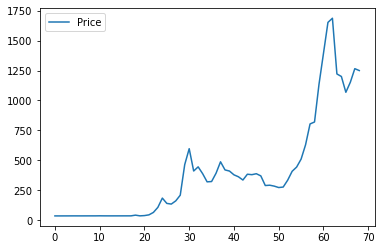

In [81]:
# Plot a line chart of the data without setting the 'Date' column as the index
gold_csv.plot()

#### iii. Set Date as Index

In [82]:
# Convert date strings into datetime objects and set the datetime as the index
gold_csv.set_index(pd.to_datetime(gold_csv['Date'], infer_datetime_format=True), inplace=True)
gold_csv.head()

,Date,Price
Date,,
1950-12-01,1950-12,34.72
1951-12-01,1951-12,34.66
1952-12-01,1952-12,34.79
1953-12-01,1953-12,34.85
1954-12-01,1954-12,35.04


#### iv. Drop Extra Columns

In [84]:
# Drop the extra date column
gold_csv.drop(columns=['Date'], inplace=True)
gold_csv.head()

KeyError: "['Date'] not found in axis"

#### v. Plot Data with Datetime Index

<AxesSubplot:xlabel='Date'>

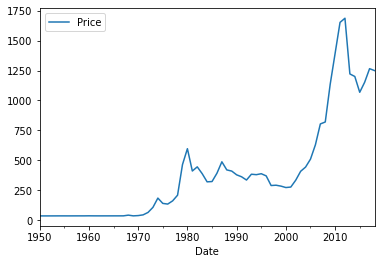

In [85]:
# Plot a line char of the data after converting and setting the 'Date' column as the datetime index
gold_csv.plot()

#### vi. Plot Bar Chart

<AxesSubplot:xlabel='Date'>

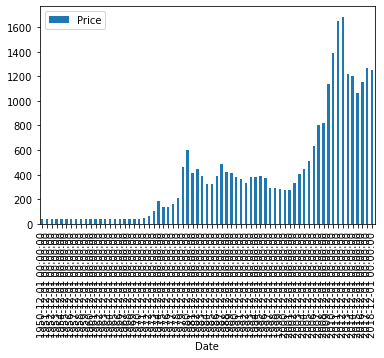

In [86]:
# Plot a bar chart of the data
gold_csv.plot(kind='bar')

#### vii. Plot Bar Chart with Increased Figure Size

<AxesSubplot:xlabel='Date'>

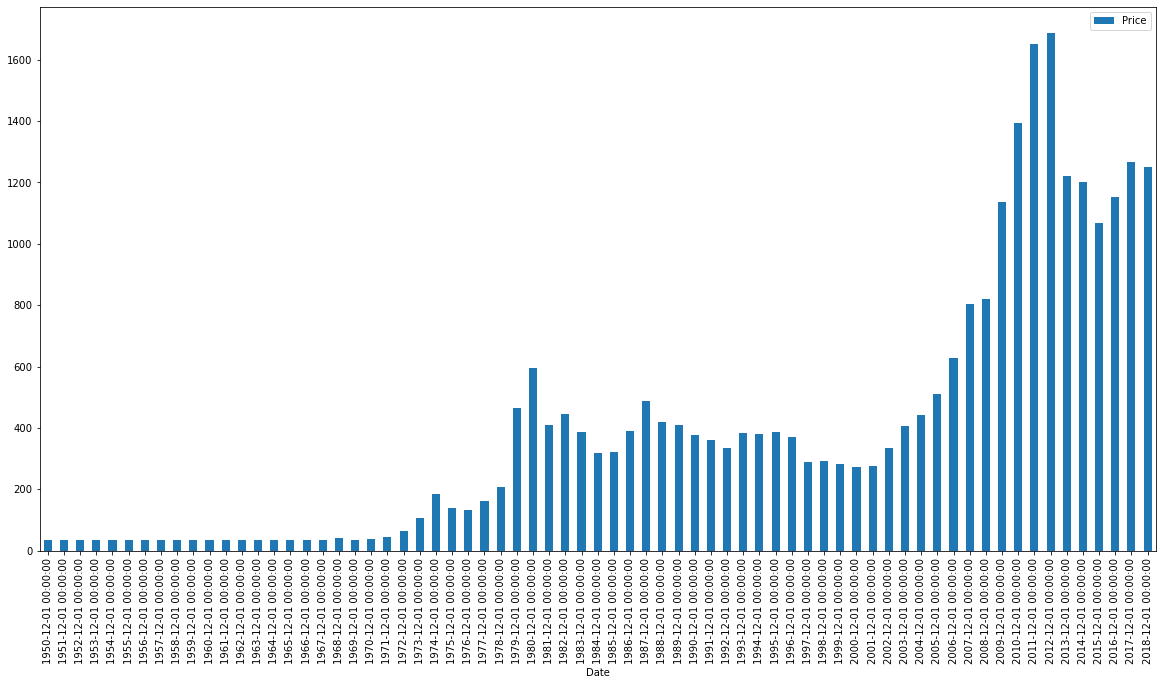

In [87]:
# Plot a bar chart of the data with increased figure size to see the x-axis labels
gold_csv.plot(kind='bar', figsize=(20,10))

### VI. Investmenmt Returns

#### i. Read CSV

In [89]:
# Read in the CSV as a DataFrame
sp500_csv = pd.read_csv('cheatsheetresources/sp500_stock_data.csv')
sp500_csv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-02,1885.300049,1891.329956,1878.500000,1881.140015,1881.140015,3159560000
1,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
2,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
3,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
4,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000


#### ii. View Summary Statistics

In [90]:
# Use the 'describe()' function
sp500_csv.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
unique,1258,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-05-02,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2316.801637,2326.829332,2305.725223,2317.082948,2317.082948,3.596083e+09
std,NaN,317.895587,318.579627,317.124199,317.705702,317.705702,6.939543e+08
min,NaN,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.349780e+09
25%,NaN,2057.875000,2067.634888,2044.870025,2058.322449,2058.322449,3.188478e+09
50%,NaN,2179.030029,2184.969971,2172.895019,2180.639893,2180.639893,3.504925e+09
75%,NaN,2636.292481,2652.804931,2612.815063,2636.575012,2636.575012,3.893518e+09


#### iii. Drop Extra Columns

In [91]:
# Drop unnecessary columns
sp500_csv.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
sp500_csv.head()

,Date,Adj Close
0,2014-05-02,1881.140015
1,2014-05-05,1884.660034
2,2014-05-06,1867.719971
3,2014-05-07,1878.209961
4,2014-05-08,1875.630005


#### iv. Set Date as Index


In [92]:
# Set the date as the index to the DataFrame
sp500_csv.set_index(pd.to_datetime(sp500_csv['Date'], infer_datetime_format=True), inplace=True)
sp500_csv.head()

,Date,Adj Close
Date,,
2014-05-02,2014-05-02,1881.140015
2014-05-05,2014-05-05,1884.660034
2014-05-06,2014-05-06,1867.719971
2014-05-07,2014-05-07,1878.209961
2014-05-08,2014-05-08,1875.630005


#### v. Drop Extra Date Column

In [93]:
# Drop the extra date column
sp500_csv.drop(columns=['Date'], inplace=True)
sp500_csv.head()

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


#### vi. Plot Daily Close

<AxesSubplot:xlabel='Date'>

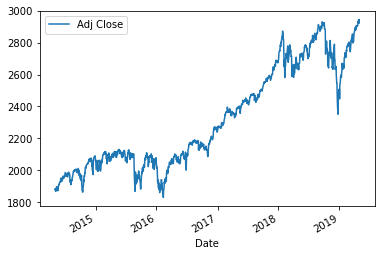

In [94]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
sp500_csv.plot()

#### vii. Calculate Daily Returns (Method 1)

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

Where $r$ is daily returns, ${p_{t}}$ is the price at time $t$, and ${p_{t-1}}$ is the price at $t-1$ (offset by 1).

In [95]:
# Calculate the daily return using the 'shift()' function
daily_returns = (sp500_csv - sp500_csv.shift(1)) / sp500_csv.shift(1)
daily_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


#### viii. Calculate Daily Returns (Method 2)

In [96]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = sp500_csv.pct_change()
daily_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


#### ix. Plot Daily Returns

<AxesSubplot:xlabel='Date'>

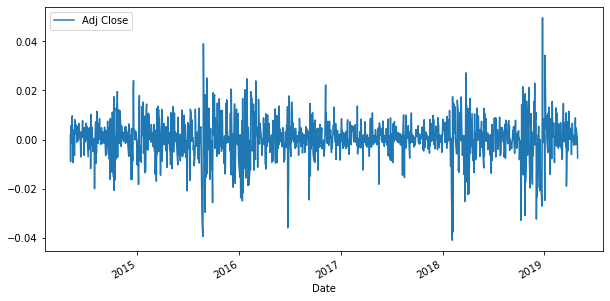

In [97]:
# Plot the daily returns of the S&P 500 over the last 5 years
daily_returns.plot(figsize=(10,5))

#### x. Calculate Cumulative Returns

In [98]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,1.001871
2014-05-06,0.992866
2014-05-07,0.998442
2014-05-08,0.997071


#### xi. Plot Cumulative Returns

<AxesSubplot:xlabel='Date'>

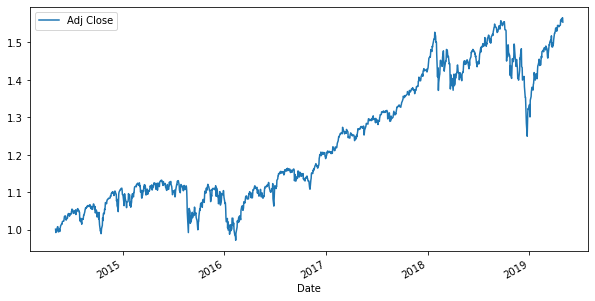

In [99]:
# Plot the daily returns of the S&P 500 over the last 5 years
cumulative_returns.plot(figsize=(10,5))

### VII. Sorting

#### i. Read CSV

In [101]:
# Read in csv
csv_path = Path("cheatsheetresources/tsla_google_finance.csv")
tsla_df = pd.read_csv(csv_path)
tsla_df.head()

,Date,Close
0,11/13/18,338.73
1,11/14/18,344.00
2,11/15/18,348.44
3,11/16/18,354.31
4,11/19/18,353.47


#### ii. Index Data by `Date`

In [102]:
# Set `Date` as index
tsla_df = tsla_df.set_index('Date')
tsla_df.head()

,Close
Date,
11/13/18,338.73
11/14/18,344.00
11/15/18,348.44
11/16/18,354.31
11/19/18,353.47


#### iii. Assess and Clean Data

In [103]:
# Check for nulls
tsla_df.isnull().mean()*100
tsla_df.isnull().sum()

# Drop missing values
tsla_df = tsla_df.dropna()

# Validate no more missing values
tsla_df.isnull().sum()
tsla_df.head()

,Close
Date,
11/13/18,338.73
11/14/18,344.00
11/15/18,348.44
11/16/18,354.31
11/19/18,353.47


#### iv. Calculate Daily Returns

In [105]:
# Calculate daily returns
tsla_daily_returns = tsla_df.pct_change()
tsla_daily_returns.head()

,Close
Date,
11/13/18,NaN
11/14/18,0.015558
11/15/18,0.012907
11/16/18,0.016847
11/19/18,-0.002371


#### Sort the DataFrame by `Close` to Get Records with Top Daily Returns

In [106]:
# Sort data by `Close` in descending order
tsla_top_changes = tsla_daily_returns.sort_values("Close", ascending = False)
tsla_top_changes.head()

,Close
Date,
12/26/18,0.103930
11/26/18,0.061903
1/4/19,0.057697
2/27/19,0.056671
12/28/18,0.056116


#### Slice Out 5 Records

In [107]:
# Slice out top 5
tsla_top_five = tsla_top_changes.iloc[:5]
tsla_top_five

,Close
Date,
12/26/18,0.103930
11/26/18,0.061903
1/4/19,0.057697
2/27/19,0.056671
12/28/18,0.056116


#### Plot Top 5 Performing Days for TSLA Daily Returns

<AxesSubplot:xlabel='Date'>

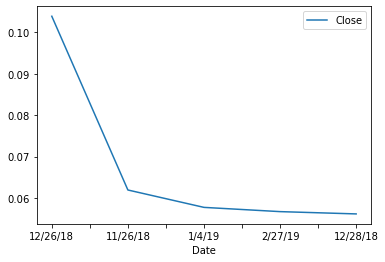

In [108]:
# Plot top 5 performing days
tsla_top_five.plot()

<AxesSubplot:xlabel='Date'>

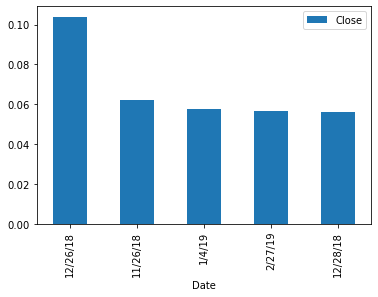

In [109]:
# Alternatively, visualizing the returns as a bar chart:
tsla_top_five.plot.bar()

### VIII. Groupby

#### i. Read CSV

In [110]:
# Read in CSV file
csv_path = Path("cheatsheetresources/crypto_data.csv")
crypto_data = pd.read_csv(csv_path, index_col='data_date', parse_dates=True, infer_datetime_format=True)
crypto_data.head()

,cryptocurrency,data_priceUsd,data_time,timestamp
data_date,,,,
2017-05-09,bitcoin,NaN,1.494288e+12,1.557285e+12
2017-05-10,bitcoin,1743.723523,1.494374e+12,NaN
2017-05-11,bitcoin,1828.678209,1.494461e+12,NaN
2017-05-12,bitcoin,1776.443919,1.494547e+12,NaN
2017-05-13,bitcoin,1714.964198,1.494634e+12,NaN


#### ii. Clean Data

In [111]:
# Drop extraneous columns
crypto_data = crypto_data.drop(columns=['data_time','timestamp'])
crypto_data = crypto_data.dropna()
crypto_data.head()

,cryptocurrency,data_priceUsd
data_date,,
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198
2017-05-14,bitcoin,1789.278913


#### iii. Group data by `cryptocurrency` and plot on the same chart

cryptocurrency
bitcoin         AxesSubplot(0.125,0.2;0.775x0.68)
bitcoin-cash    AxesSubplot(0.125,0.2;0.775x0.68)
ethereum        AxesSubplot(0.125,0.2;0.775x0.68)
litecoin        AxesSubplot(0.125,0.2;0.775x0.68)
ripple          AxesSubplot(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

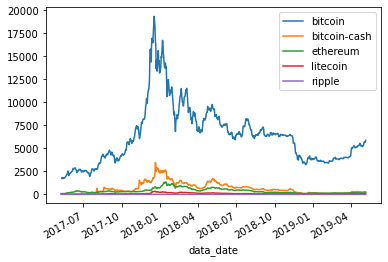

In [112]:
grouped_data = crypto_data.groupby('cryptocurrency')['data_priceUsd'].plot(legend=True)
grouped_data

#### iv. Calculate average price across two years for each cryptocurrency

In [113]:
average_price = crypto_data.groupby('cryptocurrency').mean()
average_price

,data_priceUsd
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


#### v. Calculate max price across two years for each cryptocurrency

In [114]:
max_price = crypto_data.groupby('cryptocurrency').max()
max_price

,data_priceUsd
cryptocurrency,
bitcoin,19339.922660
bitcoin-cash,3476.844119
ethereum,1346.037491
litecoin,352.713468
ripple,2.999459


#### vi. Calculate min price across two years for each cryptocurrency

In [115]:
min_price = crypto_data.groupby('cryptocurrency').min()
min_price

,data_priceUsd
cryptocurrency,
bitcoin,1714.964198
bitcoin-cash,78.977344
ethereum,84.374014
litecoin,22.550468
ripple,0.154144


### IX. Multi Indexing

#### i. Read CSV

In [116]:
# Read csv data
csv_path = Path("cheatsheetresources/goog_google_finance.csv")
goog_df = pd.read_csv(
    csv_path, parse_dates=True, index_col="Date", infer_datetime_format=True
)
goog_df.head()

,Close
Date,
2019-05-13,1132.03
2019-05-10,1164.27
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10


In [117]:
goog_df.describe()

,Close
count,64.000000
mean,1179.538906
std,46.589776
min,1095.010000
25%,1143.055000
50%,1184.540000
75%,1205.605000
max,1287.580000


#### ii. Assess & Clean Data

In [118]:
# Check for nulls
goog_df.isnull().mean() * 100

# Drop nulls
goog_df = goog_df.dropna()

# Drop duplicates
goog_df = goog_df.drop_duplicates()

# Validate no more missing values
goog_df.isnull().sum()

Close    0
dtype: int64

#### iii. Group by `year` and `month`

In [119]:
goog_df_group = goog_df.groupby([goog_df.index.year, goog_df.index.month]).first()
goog_df_group.head()

Close
Date Date         
2019 2     1119.92
     3     1173.31
     4     1188.48
     5     1132.03

#### iv. Access `Close` for May 2019 Using Multi-Indexing Lookup

In [120]:
google_may_2019_data = goog_df_group.loc[2019, 5]
google_may_2019_data

Close    1132.03
Name: (2019, 5), dtype: float64

### X. Concatenation

#### i. Read CSV

In [121]:
fin_leaders_america_path = Path('cheatsheetresources/fin_leaders_america.csv')
investors_leadership_path = Path('cheatsheetresources/invstrs_leadership.csv')
fin_leaders_mem_path = Path('cheatsheetresources/fin_leaders_members.csv')
investors_leadership_mem_path = Path('cheatsheetresources/invstrs_leadership_members.csv')

fin_leaders_dues = pd.read_csv(fin_leaders_america_path, index_col='MemberName')
investors_leadership_dues = pd.read_csv(investors_leadership_path, index_col='MemberName')
fin_leaders_mbr_status = pd.read_csv(fin_leaders_mem_path, index_col='MemberName')
investors_leadership_mbr_status = pd.read_csv(investors_leadership_mem_path, index_col='MemberName')

In [122]:
fin_leaders_dues.head()

,DuesOwed,DuesPaid
MemberName,,
Warren Buffet,0,2500
Janet Yellen,100,2400
Abigail Johnson,0,2500
Larry Fink,2500,0


In [123]:
investors_leadership_dues.head()

,DuesOwed,DuesPaid
MemberName,,
Warren Buffet,0,2500
Janet Yellen,100,2400
Abigail Johnson,0,2500
Larry Fink,2500,0
Mario Draghi,2500,0


#### ii. Concat dues data using `rows` axis and `inner` join

In [124]:
joined_dues_data = pd.concat([fin_leaders_dues, investors_leadership_dues], axis="rows", join="inner")
joined_dues_data

,DuesOwed,DuesPaid
MemberName,,
Warren Buffet,0,2500
Janet Yellen,100,2400
Abigail Johnson,0,2500
Larry Fink,2500,0
Warren Buffet,0,2500
Janet Yellen,100,2400
Abigail Johnson,0,2500
Larry Fink,2500,0
Mario Draghi,2500,0


#### iii. Concat member data using `rows` axis and `inner` join

In [125]:
joined_status_data = pd.concat([fin_leaders_mbr_status, investors_leadership_mbr_status], axis="rows", join="inner")
joined_status_data

,MembershipStatus
MemberName,
Warren Buffet,Good Standing
Janet Yellen,Good Standing
Abigail Johnson,Good Standing
Larry Fink,Delinquent
Warren Buffet,Good Standing
Janet Yellen,Good Standing
Abigail Johnson,Good Standing
Larry Fink,Delinquent
Mario Draghi,Delinquent


#### iv. Concat dues and member data using `columns` axis and `inner` join

In [126]:
joined_data = pd.concat([joined_dues_data, joined_status_data], axis="columns", join="outer")
joined_data

,DuesOwed,DuesPaid,MembershipStatus
MemberName,,,
Warren Buffet,0,2500,Good Standing
Janet Yellen,100,2400,Good Standing
Abigail Johnson,0,2500,Good Standing
Larry Fink,2500,0,Delinquent
Warren Buffet,0,2500,Good Standing
Janet Yellen,100,2400,Good Standing
Abigail Johnson,0,2500,Good Standing
Larry Fink,2500,0,Delinquent
Mario Draghi,2500,0,Delinquent


### XI. Standard Deviations

#### i. Read CSV

In [127]:
file_path = Path("cheatsheetresources/tech_stocks_closing_value_2018.csv")
tech_stocks = pd.read_csv(file_path, index_col='Date', parse_dates=True)
tech_stocks.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-02,168.339050,84.128128,1065.000000,181.419998,1189.010010
2018-01-03,168.309738,84.519646,1082.479980,184.669998,1204.199951
2018-01-04,169.091522,85.263542,1086.400024,184.330002,1209.589966
2018-01-05,171.016678,86.320648,1102.229980,186.850006,1229.140015
2018-01-08,170.381485,86.408737,1106.939941,188.279999,1246.869995


#### ii. Calculate Daily Returns

In [128]:
# Compute daily returns
daily_returns = tech_stocks.pct_change()
daily_returns.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.004654,0.016413,0.017914,0.012775
2018-01-04,0.004645,0.008801,0.003621,-0.001841,0.004476
2018-01-05,0.011385,0.012398,0.014571,0.013671,0.016163
2018-01-08,-0.003714,0.001020,0.004273,0.007653,0.014425


#### iii. Calcualte standard deviation using `std` function

In [129]:
# Daily Standard Deviations
daily_std = daily_returns.std()
daily_std

AAPL    0.018106
MSFT    0.017839
GOOG    0.017724
FB      0.023949
AMZN    0.022768
dtype: float64

#### iv. Sort standard deviation in desc order 

In [130]:
# Identify the stock with the most risk
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

FB      0.023949
AMZN    0.022768
AAPL    0.018106
MSFT    0.017839
GOOG    0.017724
dtype: float64

#### v. Calculate the annualized standard deviation

In [133]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

FB      0.380172
AMZN    0.361434
AAPL    0.287428
MSFT    0.283180
GOOG    0.281354
dtype: float64

#### vi. Plot standard deviation for 3 different portfolios to determine which has the most risk

<AxesSubplot:ylabel='Frequency'>

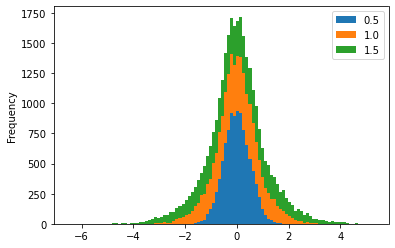

In [134]:
portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

#### vii. Plot standard deviation using box plot

<AxesSubplot:>

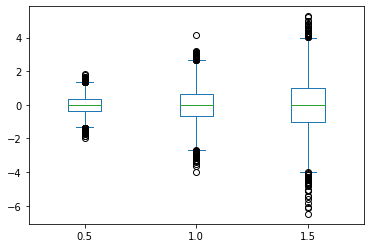

In [135]:
# Plot box plot
portfolio_std.plot.box()

### XII. Sharpe Ratio